In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data.csv", names=["x2", "x1", "y"])
df

,x2,x1,y
0,5.636857,0.664333,-3.712103
1,9.636857,1.264333,-7.741623
2,9.236857,6.864333,-9.806370
3,3.636857,3.564333,-3.656829
4,0.536857,-1.635667,0.444308
...,...,...,...
95,0.636857,0.964333,-0.240002
96,2.336857,-0.535667,-1.070106
97,3.236857,6.064333,-5.513606
98,0.436857,2.164333,-0.563969


In [3]:
x = df[["x2", "x1"]]
y = df["y"]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
l1 = Lasso(.1).fit(x_train, y_train)
y_pred = l1.predict(x_test)

In [6]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(l1.coef_, l1.intercept_)

0.18900013182725012
0.9730867652459504
[-0.71892603 -0.48735449] 0.4647255269417121


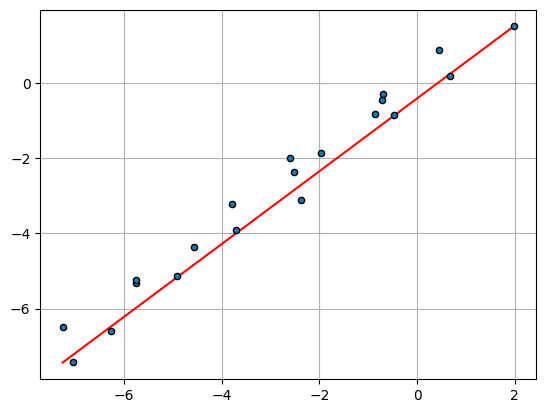

In [7]:
plt.scatter(y_test, y_pred, s=20, ec="black", zorder=3)
plt.plot((y_test.min(), y_test.max()), (y_pred.min(), y_pred.max()), c="r")

plt.grid()
plt.show()

In [8]:
l2 = Ridge(.1).fit(x_train, y_train)
y_pred = l2.predict(x_test)

In [9]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(l2.coef_, l2.intercept_)

0.19415562247357124
0.9723526338530497
[-0.73020147 -0.49871082] 0.5560056279778305


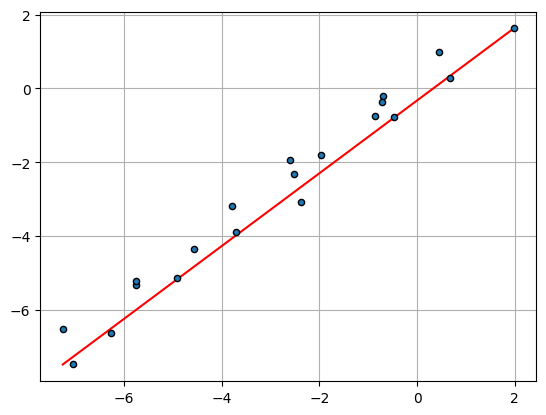

In [10]:
plt.scatter(y_test, y_pred, s=20, ec="black", zorder=3)
plt.plot((y_test.min(), y_test.max()), (y_pred.min(), y_pred.max()), c="r")

plt.grid()
plt.show()

In [11]:
alphas = [.001, .005, .1, .5, 1, 2]
coef_ = {}
for i in range(2):
	coef_[f"Lasso x{i + 1}"] = []
	coef_[f"Ridge x{i + 1}"] = []

coef_["Lasso c"] = []
coef_["Ridge c"] = []

In [12]:
coef_

{'Lasso x1': [],
 'Ridge x1': [],
 'Lasso x2': [],
 'Ridge x2': [],
 'Lasso c': [],
 'Ridge c': []}

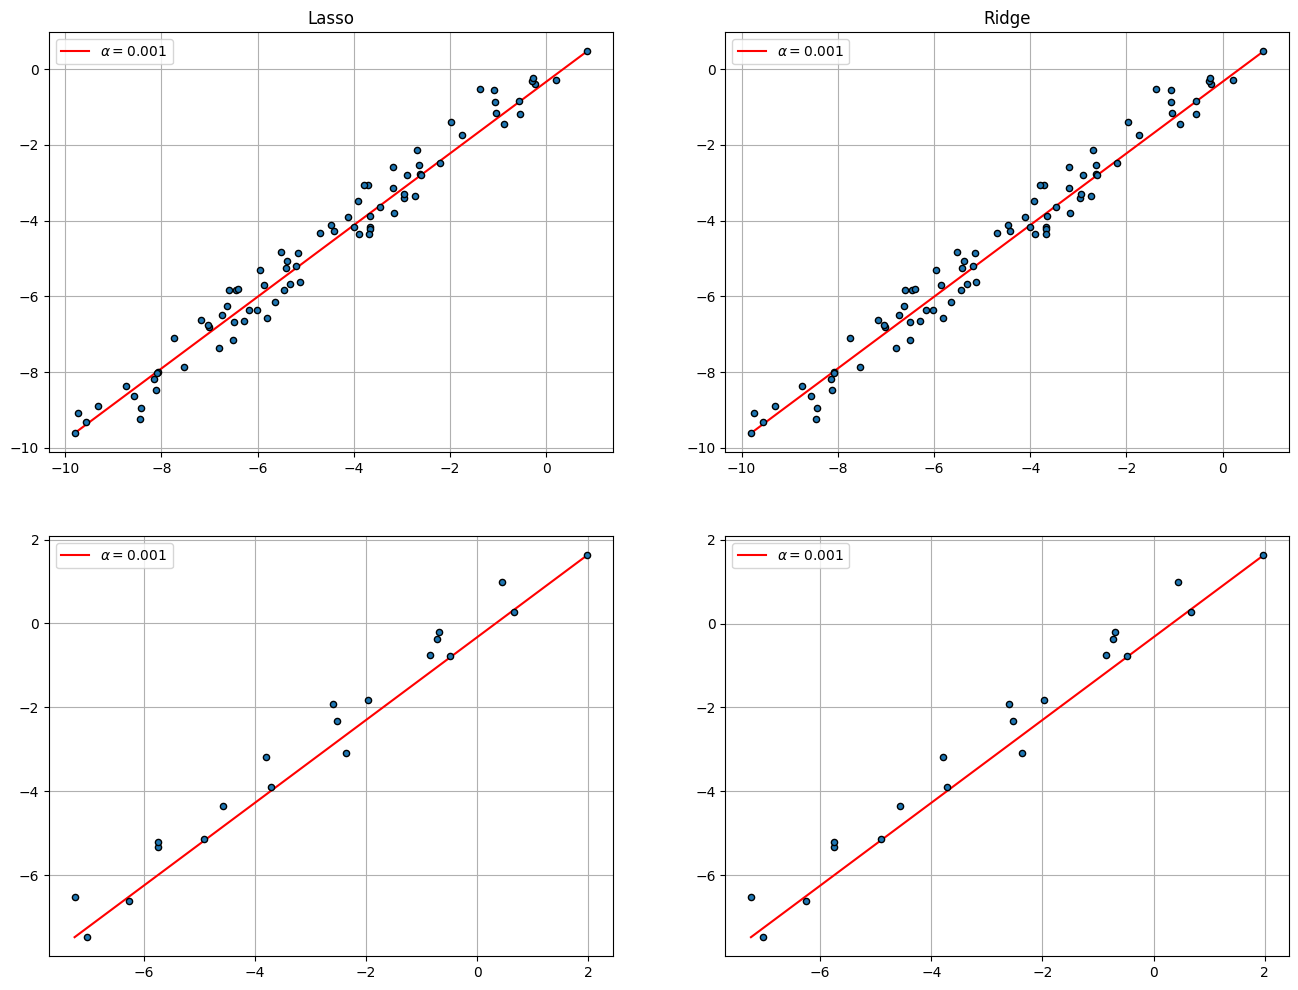

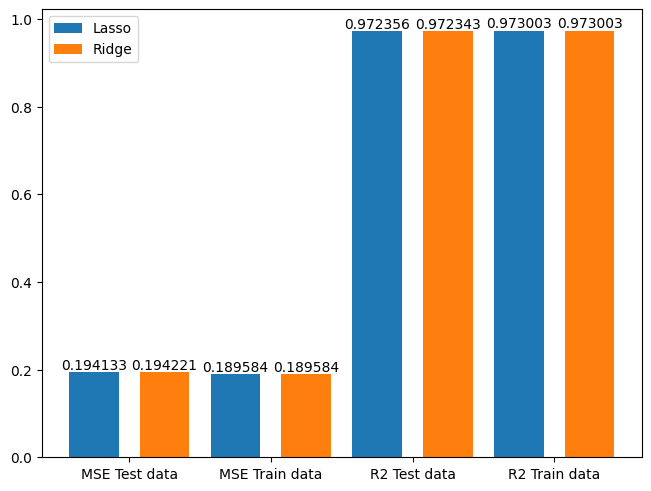

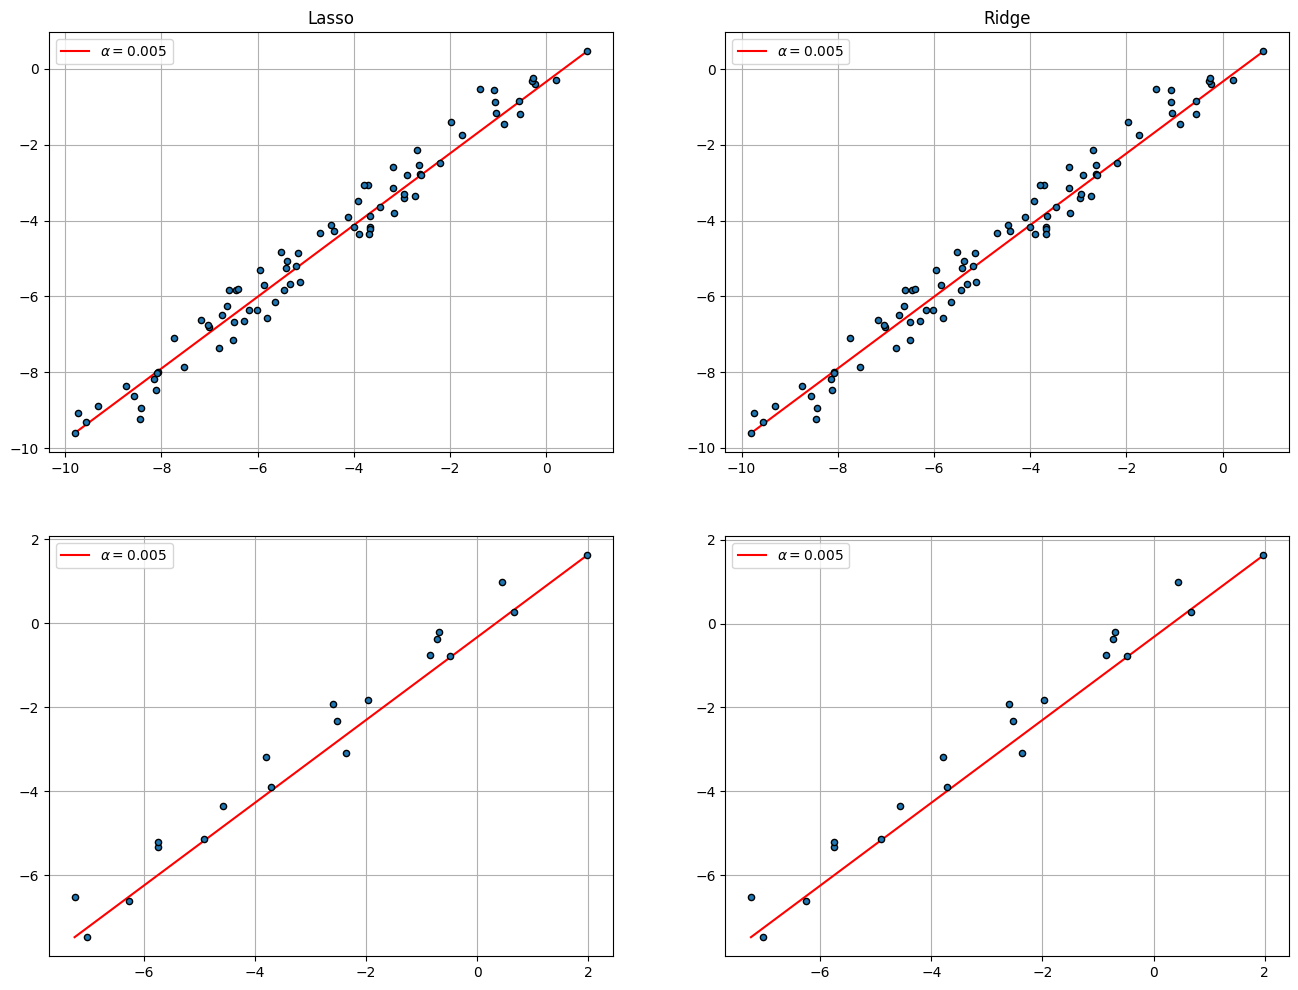

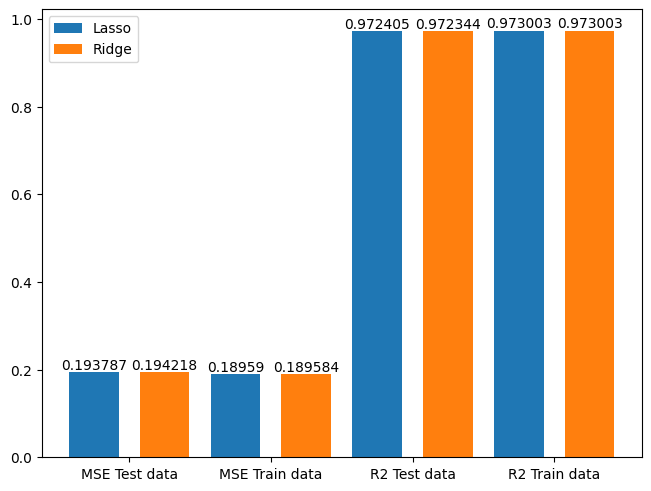

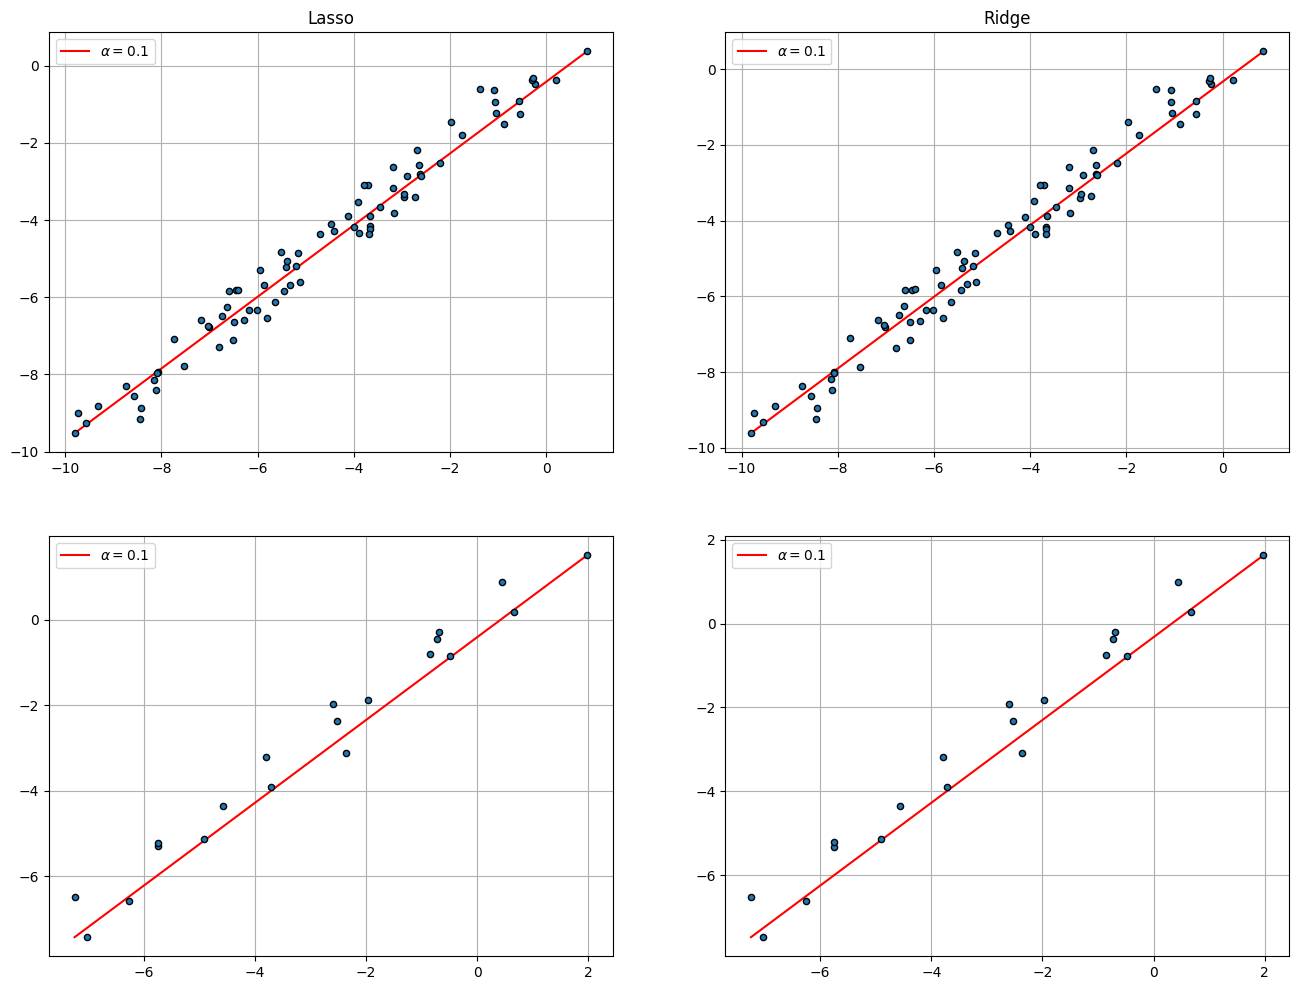

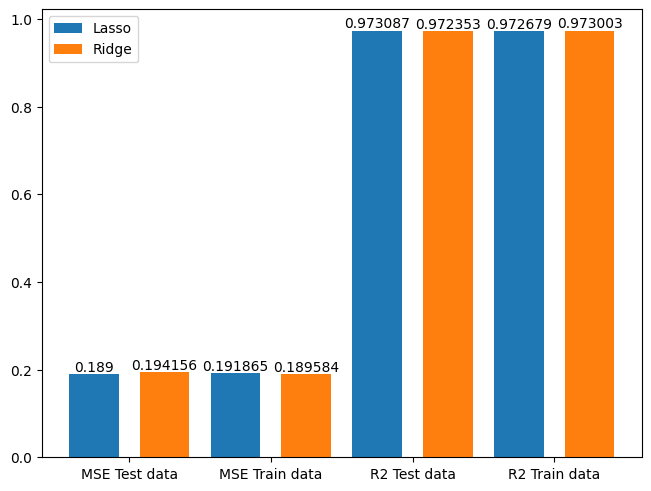

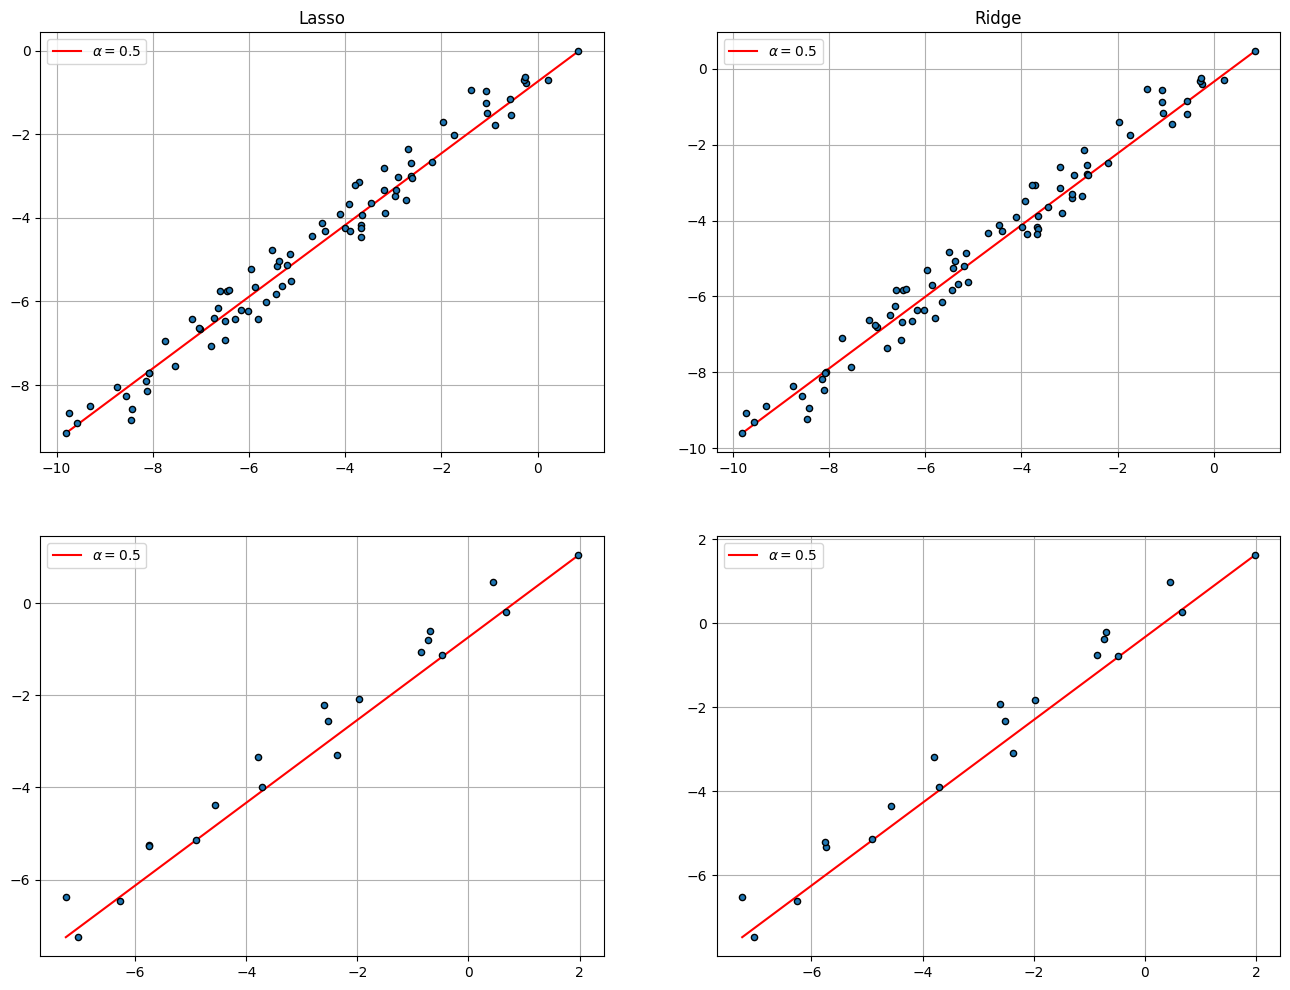

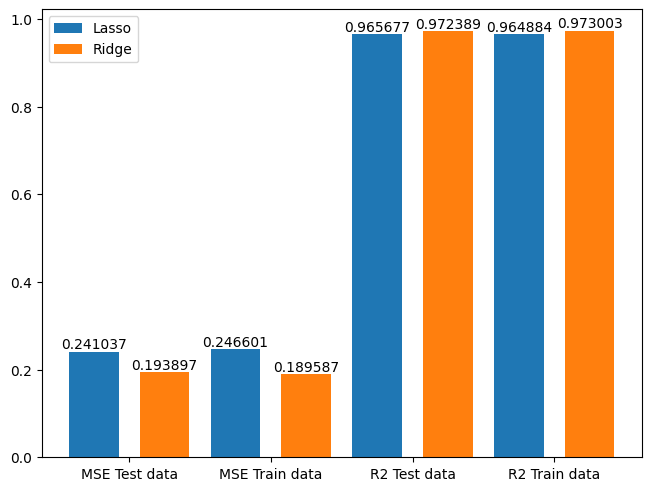

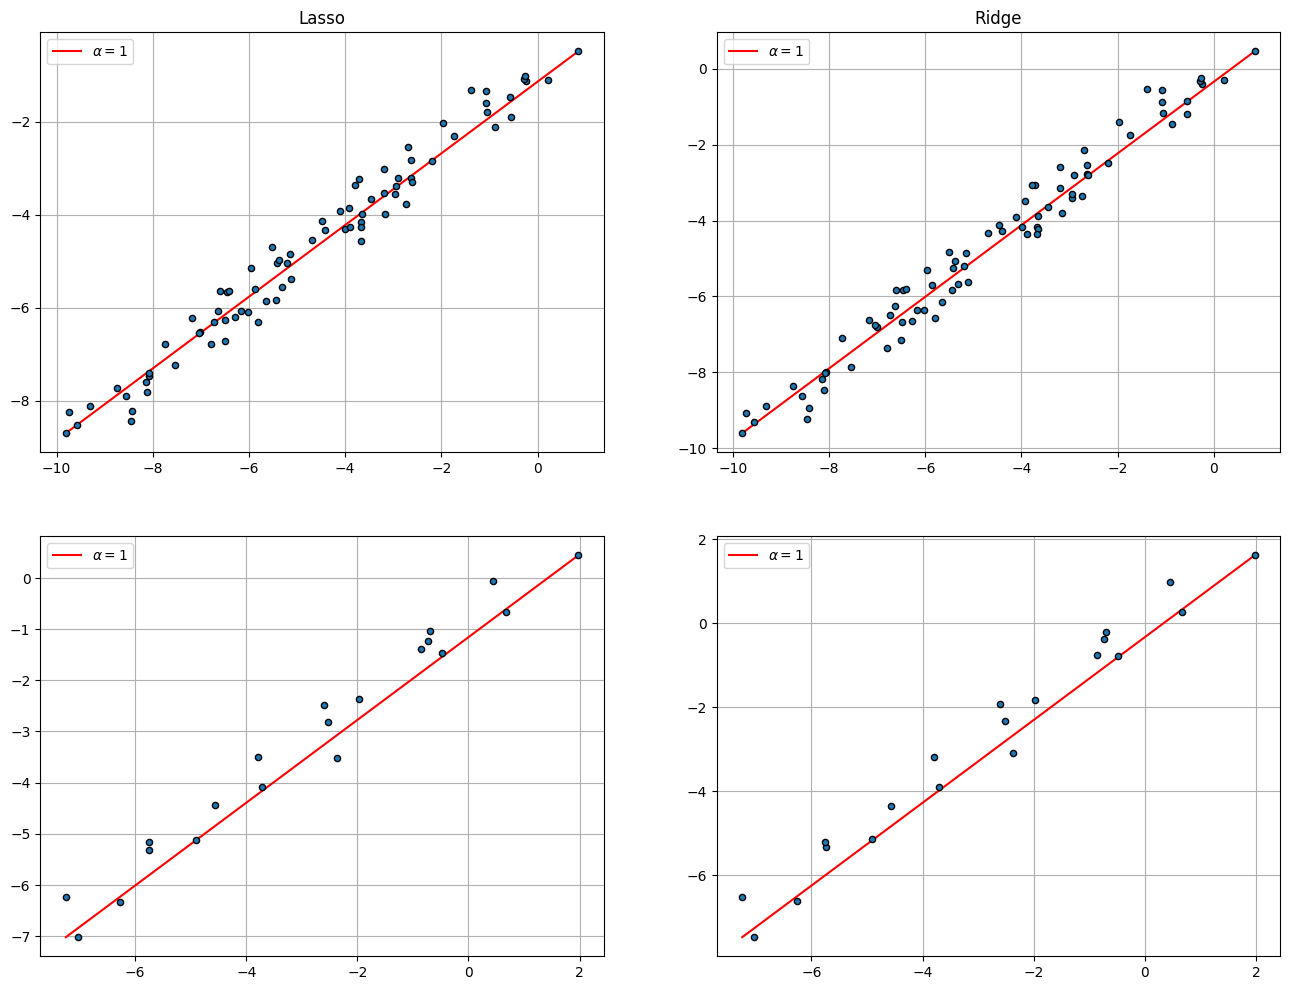

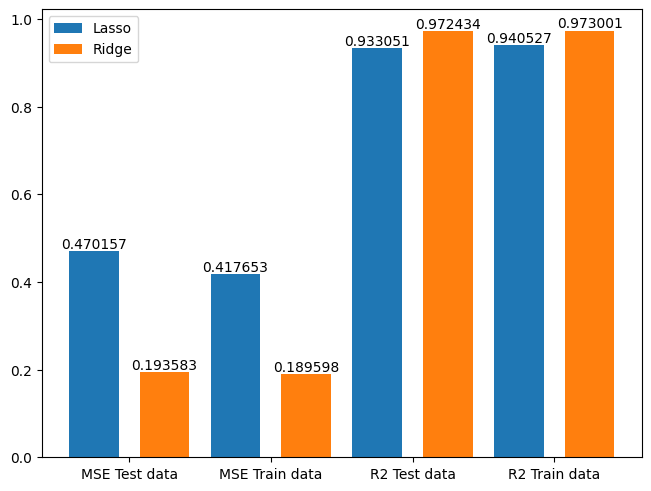

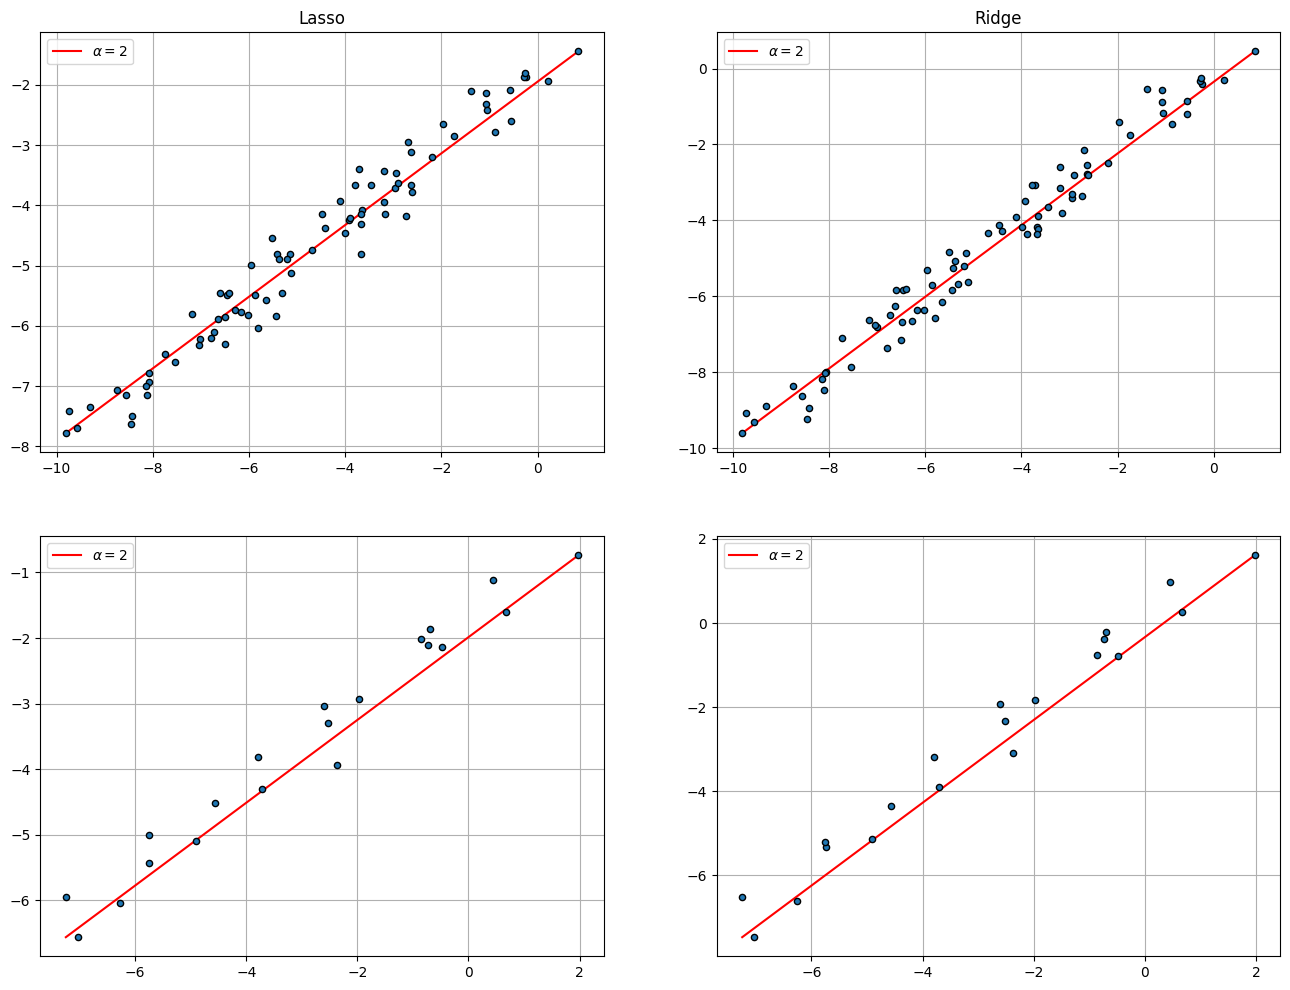

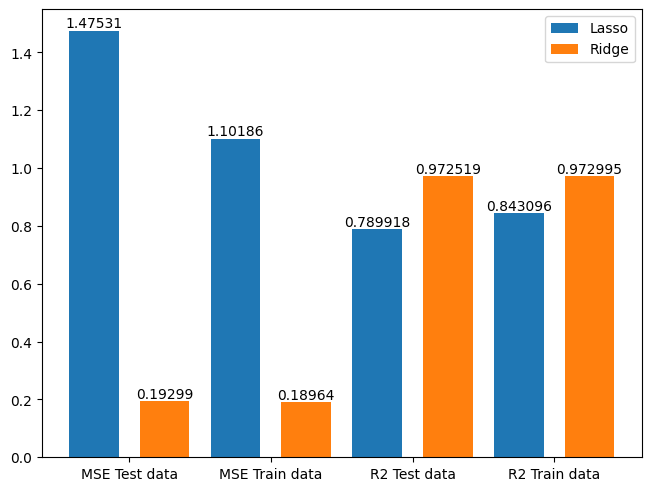

In [13]:
for alpha in alphas:
    l1 = Lasso(alpha).fit(x_train, y_train)
    l2 = Ridge(alpha).fit(x_train, y_train)

    y_pred_l1_train = l1.predict(x_train)
    y_pred_l2_train = l2.predict(x_train)
    y_pred_l1_test = l1.predict(x_test)
    y_pred_l2_test = l2.predict(x_test)

    fig, ax = plt.subplots(2, 2, figsize=(16, 12))

    ax[0, 0].set_title("Lasso")
    ax[0, 1].set_title("Ridge")

    ax[0, 0].scatter(y_train, y_pred_l1_train, s=20, ec="black", zorder=3)
    ax[0, 1].scatter(y_train, y_pred_l2_train, s=20, ec="black", zorder=3)
    
    ax[0, 0].plot((y_train.min(), y_train.max()), (y_pred_l1_train.min(), y_pred_l1_train.max()), c="r", label=rf"$\alpha={alpha}$")
    ax[0, 1].plot((y_train.min(), y_train.max()), (y_pred_l2_train.min(), y_pred_l2_train.max()), c="r", label=rf"$\alpha={alpha}$")

    ax[1, 0].scatter(y_test, y_pred_l1_test, s=20, ec="black", zorder=3)
    ax[1, 1].scatter(y_test, y_pred_l2_test, s=20, ec="black", zorder=3)

    ax[1, 0].plot((y_test.min(), y_test.max()), (y_pred_l1_test.min(), y_pred_l1_test.max()), c="r", label=rf"$\alpha={alpha}$")
    ax[1, 1].plot((y_test.min(), y_test.max()), (y_pred_l2_test.min(), y_pred_l2_test.max()), c="r", label=rf"$\alpha={alpha}$")

    for i in range(2):
        for j in range(2):
            ax[i, j].grid()
            ax[i, j].legend()

    plt.show()

    coef_L = l1.coef_
    coef_R = l2.coef_
    intercept_L = l1.intercept_
    intercept_R = l2.intercept_

    for i in range(2):
        coef_[f"Ridge x{i + 1}"] += [coef_R[i]]
        coef_[f"Lasso x{i + 1}"] += [coef_L[i]]
    
    coef_["Lasso c"] += [intercept_L]
    coef_["Ridge c"] += [intercept_R]

    fig, ax = plt.subplots(layout="constrained")

    names_errors_with_data = ("MSE Test data", "MSE Train data", "R2 Test data", "R2 Train data")
    width = .35
    count = 0

    errors = {
        "Lasso": (
            mean_squared_error(y_test, y_pred_l1_test),
            mean_squared_error(y_train, y_pred_l1_train),
            r2_score(y_test, y_pred_l1_test),
            r2_score(y_train, y_pred_l1_train),
        ),

        "Ridge": (
            mean_squared_error(y_test, y_pred_l2_test),
            mean_squared_error(y_train, y_pred_l2_train),
            r2_score(y_test, y_pred_l2_test),
            r2_score(y_train, y_pred_l2_train),
        ),
    }

    x = np.arange(len(names_errors_with_data))
    for k, v in errors.items():
        offset = width * count + .15 * count
        rects = ax.bar(x + offset, v, width, label=k)
        ax.bar_label(rects)
        count += 1

    ax.set_xticks(x + .25, names_errors_with_data)
    ax.legend()

    plt.show()

In [14]:
coef_

{'Lasso x1': [np.float64(-0.7301939515266215),
  np.float64(-0.7297386821060255),
  np.float64(-0.7189260333668706),
  np.float64(-0.6733990913072709),
  np.float64(-0.6164904137327716),
  np.float64(-0.5026730585837728)],
 'Ridge x1': [np.float64(-0.7303067023855309),
  np.float64(-0.7303024499163209),
  np.float64(-0.7302014683627499),
  np.float64(-0.7297765898113173),
  np.float64(-0.7292461881924511),
  np.float64(-0.7281877004186994)],
 'Lasso x2': [np.float64(-0.49866538117222103),
  np.float64(-0.49820837550747327),
  np.float64(-0.4873544909697143),
  np.float64(-0.44165392449493995),
  np.float64(-0.384528216401472),
  np.float64(-0.27027680021453615)],
 'Ridge x2': [np.float64(-0.49877894459612876),
  np.float64(-0.49877619172636867),
  np.float64(-0.4987108199451742),
  np.float64(-0.49843575706826193),
  np.float64(-0.4980923522802335),
  np.float64(-0.49740695175426203)],
 'Lasso c': [np.float64(0.5558429358793564),
  np.float64(0.5521614244071289),
  np.float64(0.4647255

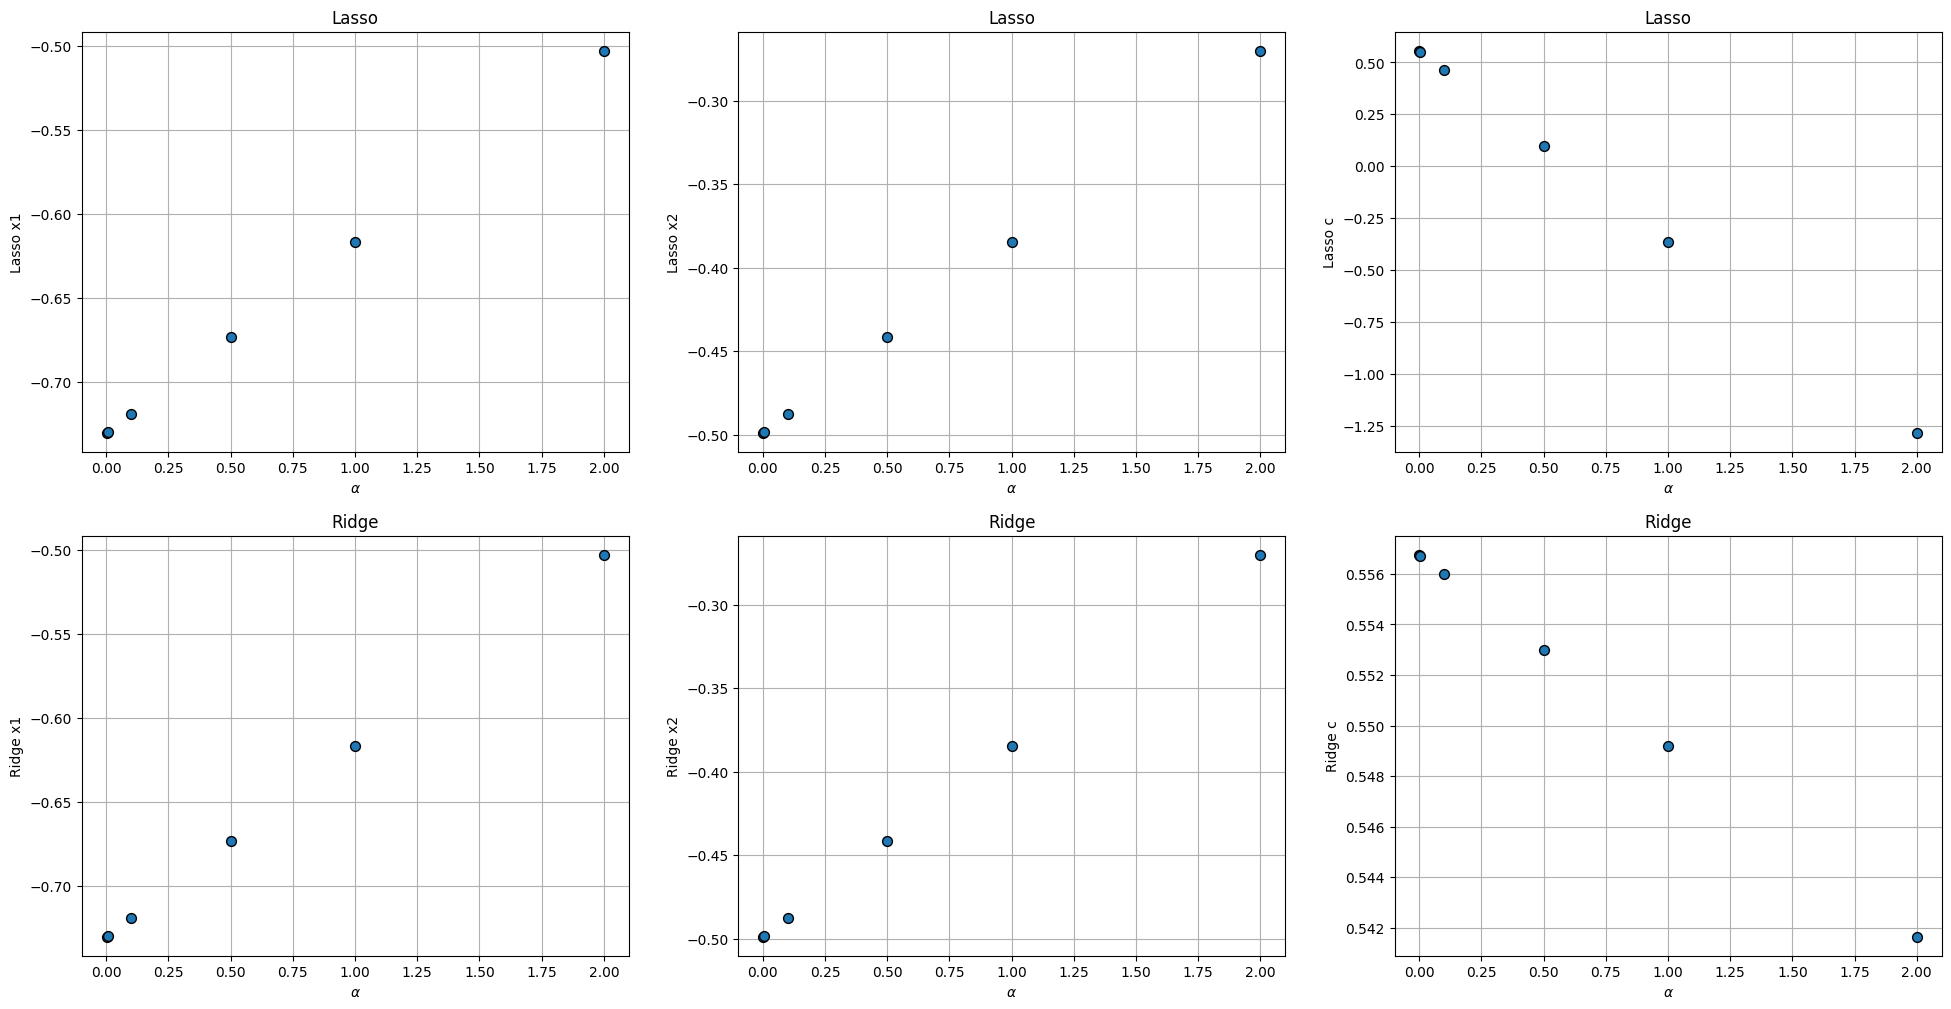

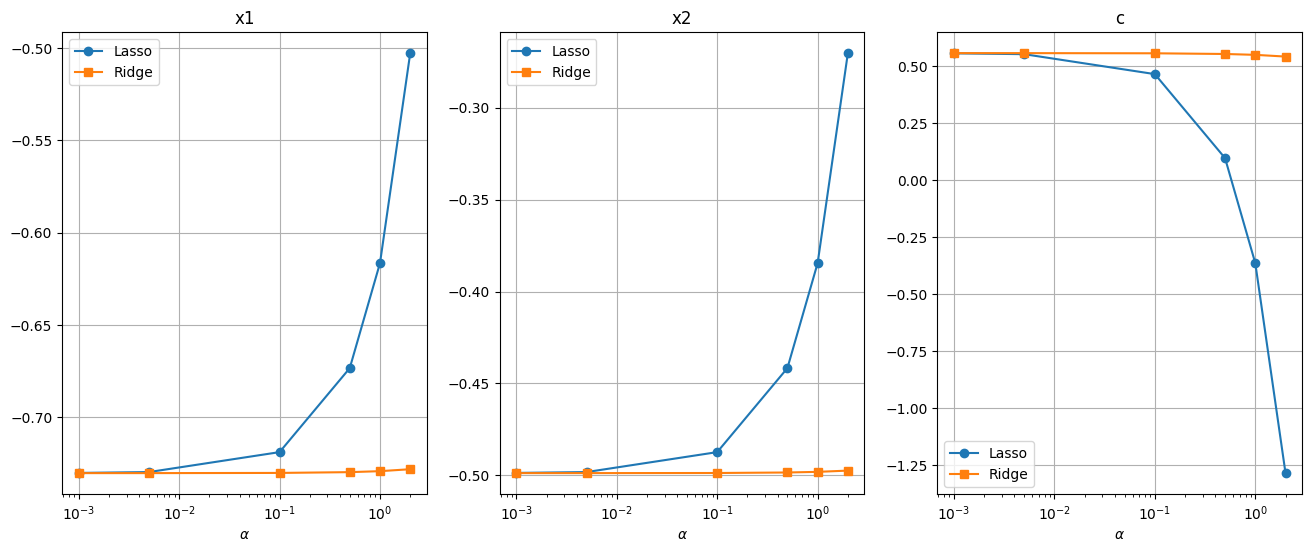

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(24, 12))

for i in range(3):
	ax[0, i].set_title(f"Lasso")
	ax[1, i].set_title(f"Ridge")

	ax[0, i].set_xlabel(r"$\alpha$")
	ax[1, i].set_xlabel(r"$\alpha$")
	
	if i < 2:
		ax[0, i].set_ylabel(f"Lasso x{i + 1}")
		ax[1, i].set_ylabel(f"Ridge x{i + 1}")

		ax[0, i].scatter(alphas, coef_[f"Lasso x{i + 1}"], s=50, ec="black", zorder=3)
		ax[1, i].scatter(alphas, coef_[f"Lasso x{i + 1}"], s=50, ec="black", zorder=3)
	
	else:
		ax[0, i].set_ylabel(f"Lasso c")
		ax[1, i].set_ylabel(f"Ridge c")

		ax[0, i].scatter(alphas, coef_["Lasso c"], s=50, ec="black", zorder=3)
		ax[1, i].scatter(alphas, coef_["Ridge c"], s=50, ec="black", zorder=3)

	for j in range(2):
		ax[j, i].grid()

plt.show()


fig, ax = plt.subplots(1, 3, figsize=(16, 6))

for i in range(3):
	ax[i].set_xlabel(r"$\alpha$")
	ax[i].grid()

	if i < 2:
		ax[i].set_title(f"x{i + 1}")

		ax[i].semilogx(alphas, coef_[f"Lasso x{i + 1}"], "o-", label="Lasso")
		ax[i].semilogx(alphas, coef_[f"Ridge x{i + 1}"], "s-", label="Ridge")
	
	else:
		ax[i].set_title(f"c")

		ax[i].semilogx(alphas, coef_["Lasso c"], "o-", label="Lasso")
		ax[i].semilogx(alphas, coef_["Ridge c"], "s-", label="Ridge")
	
	ax[i].legend()

In [16]:
df = pd.read_csv("data.csv", names=["x2", "x1", "y"])

x = df[["x1", "x2"]]
y = df["y"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

c:\Users\ebeck\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.751e-01, tolerance: 5.618e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\ebeck\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.838e+00, tolerance: 5.618e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\ebeck\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

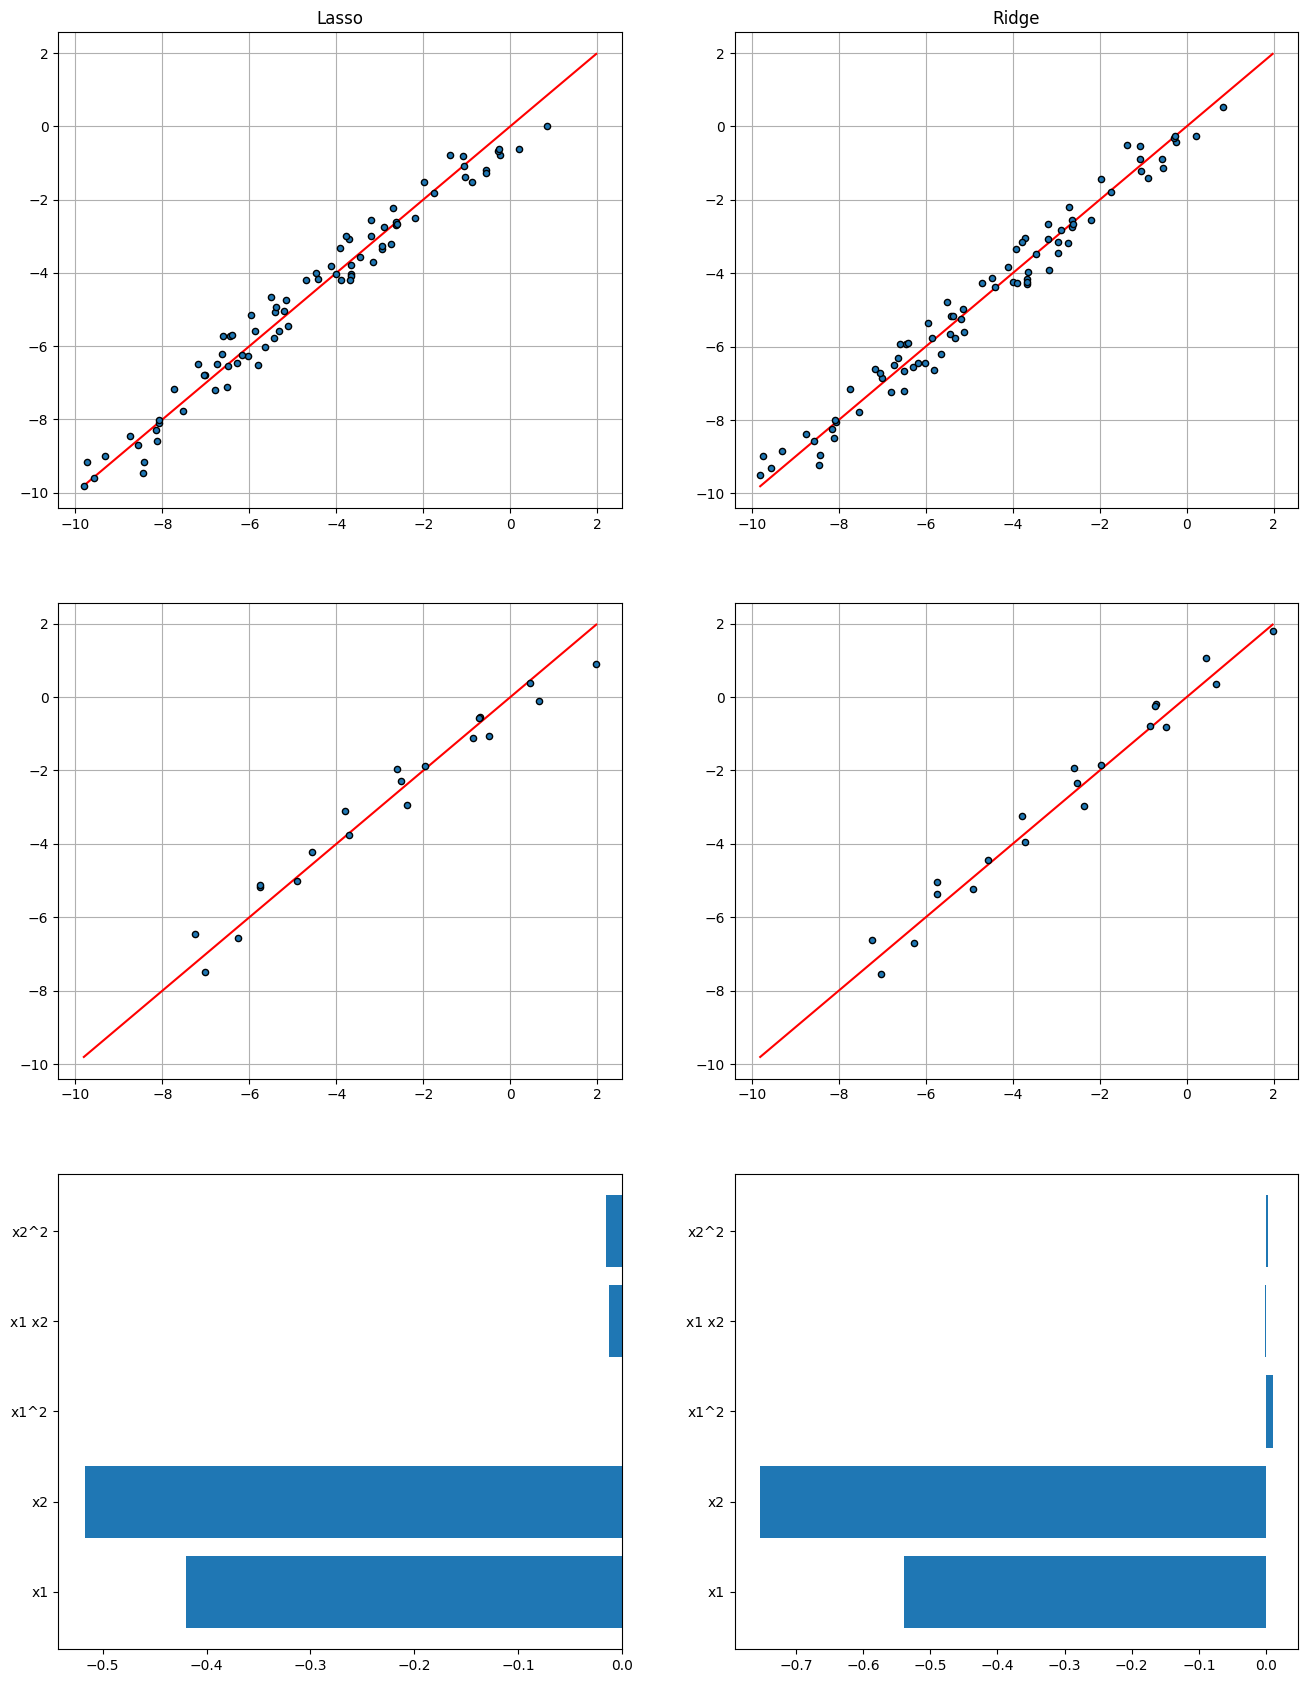

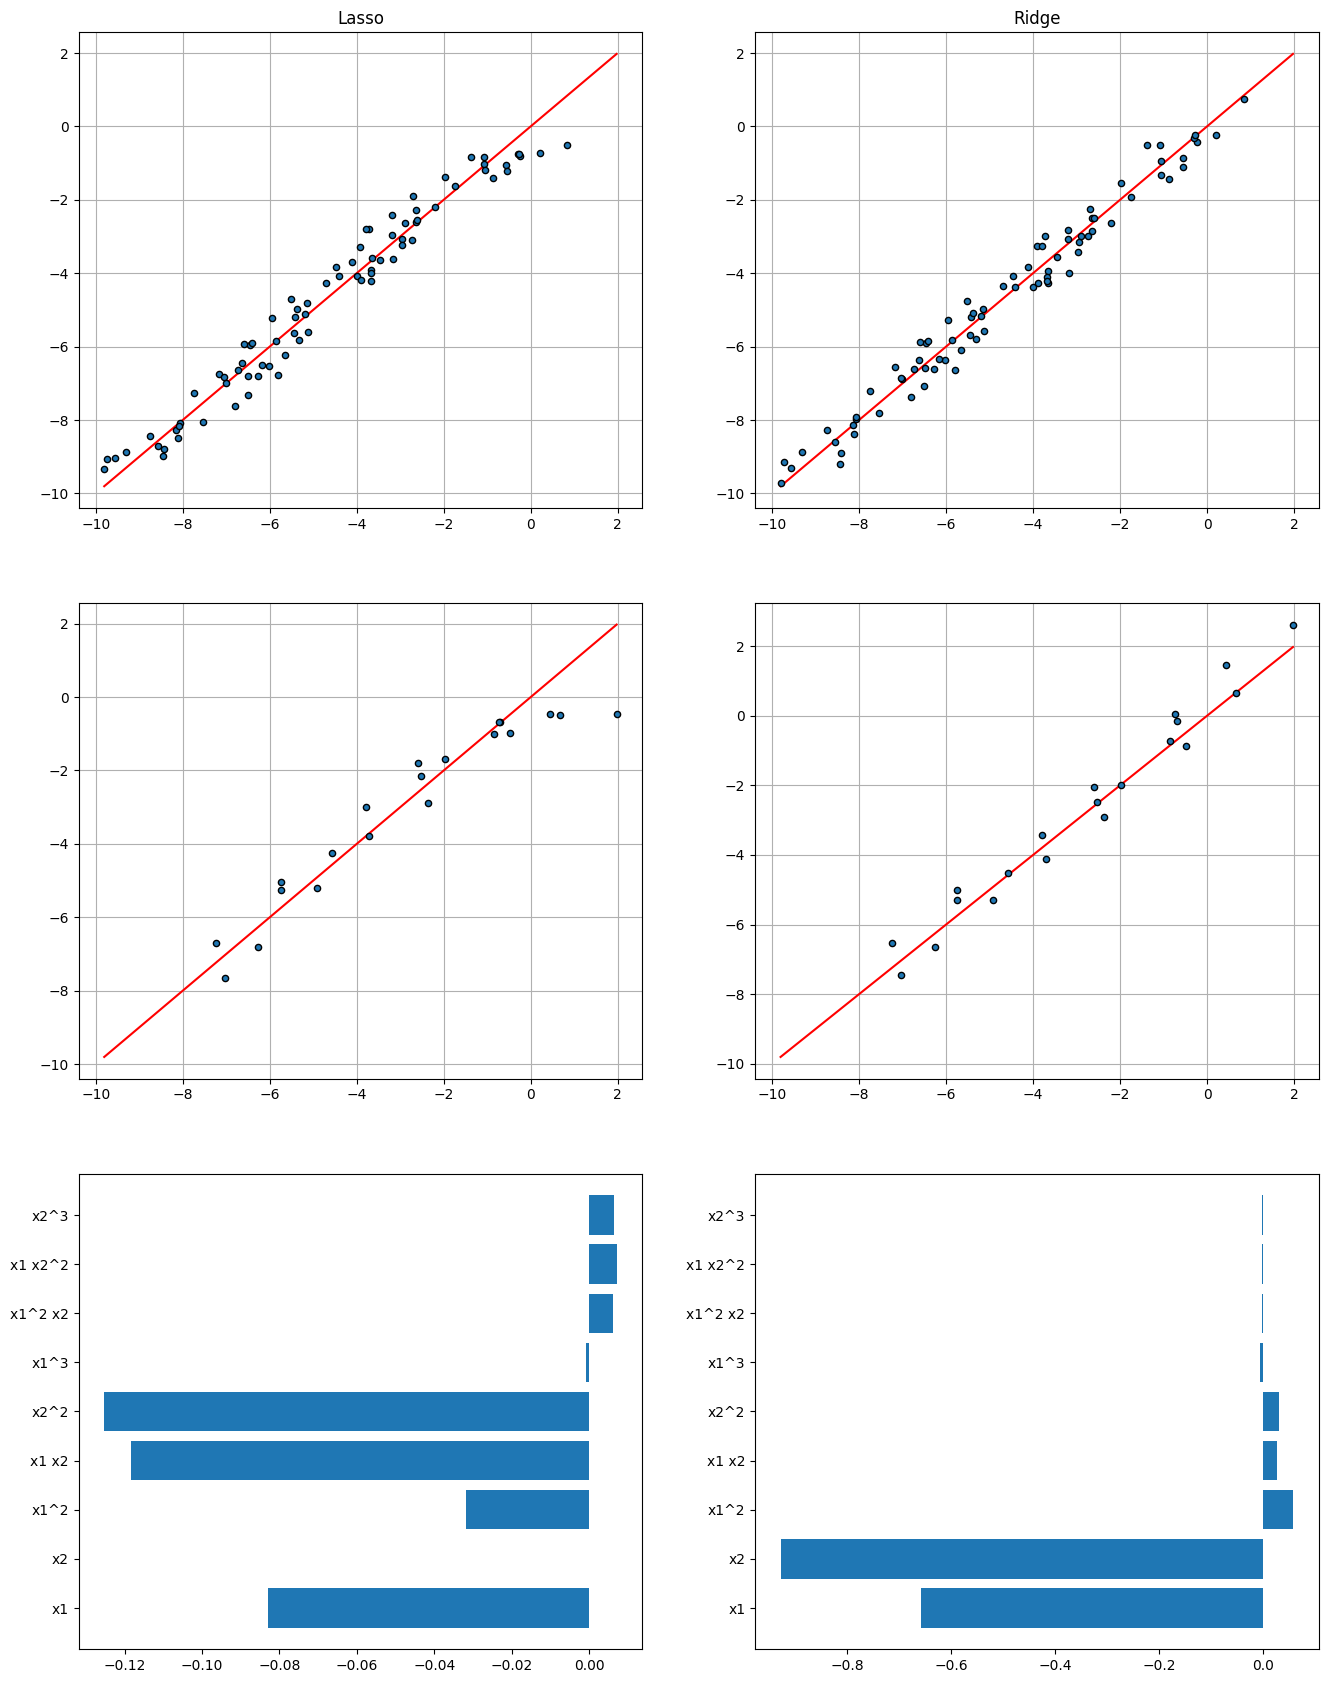

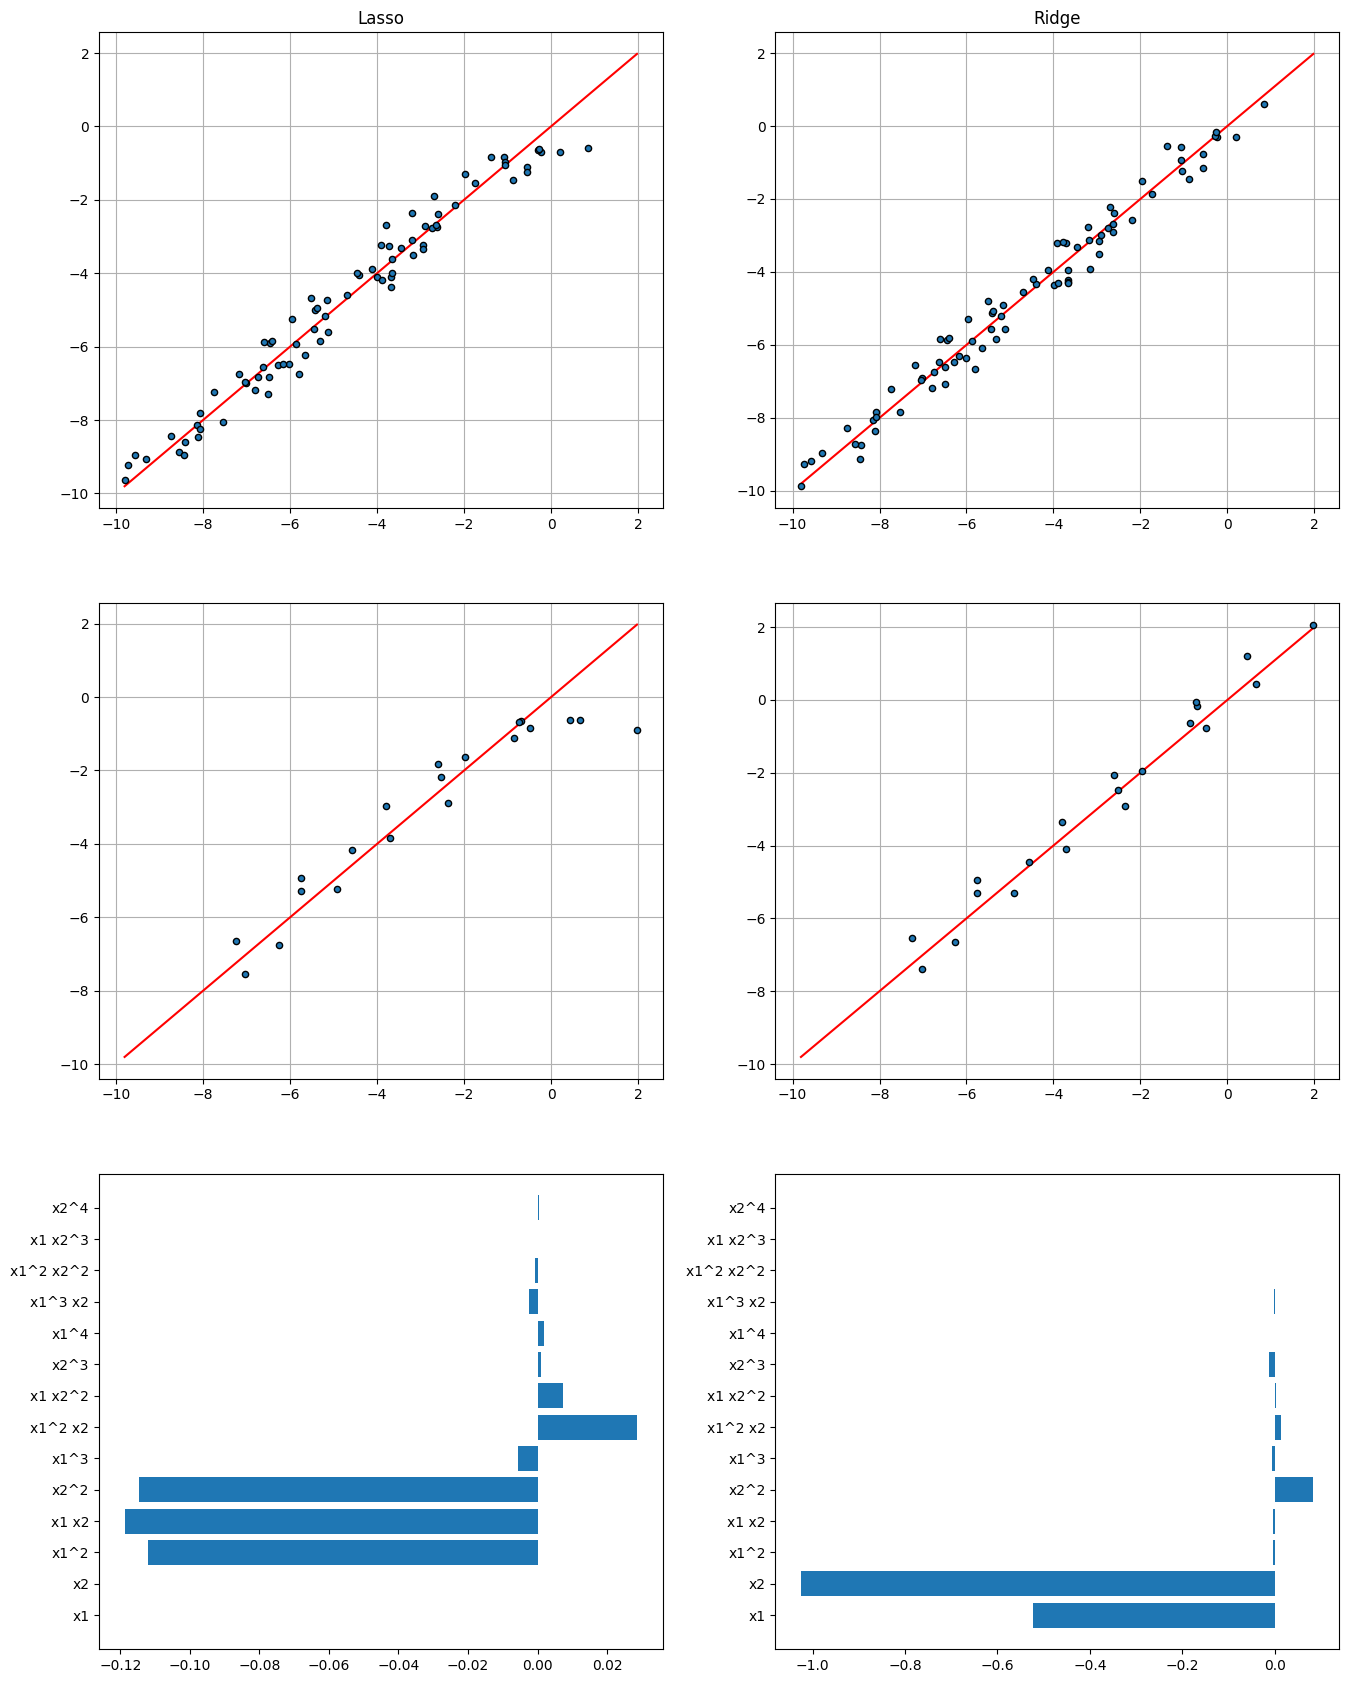

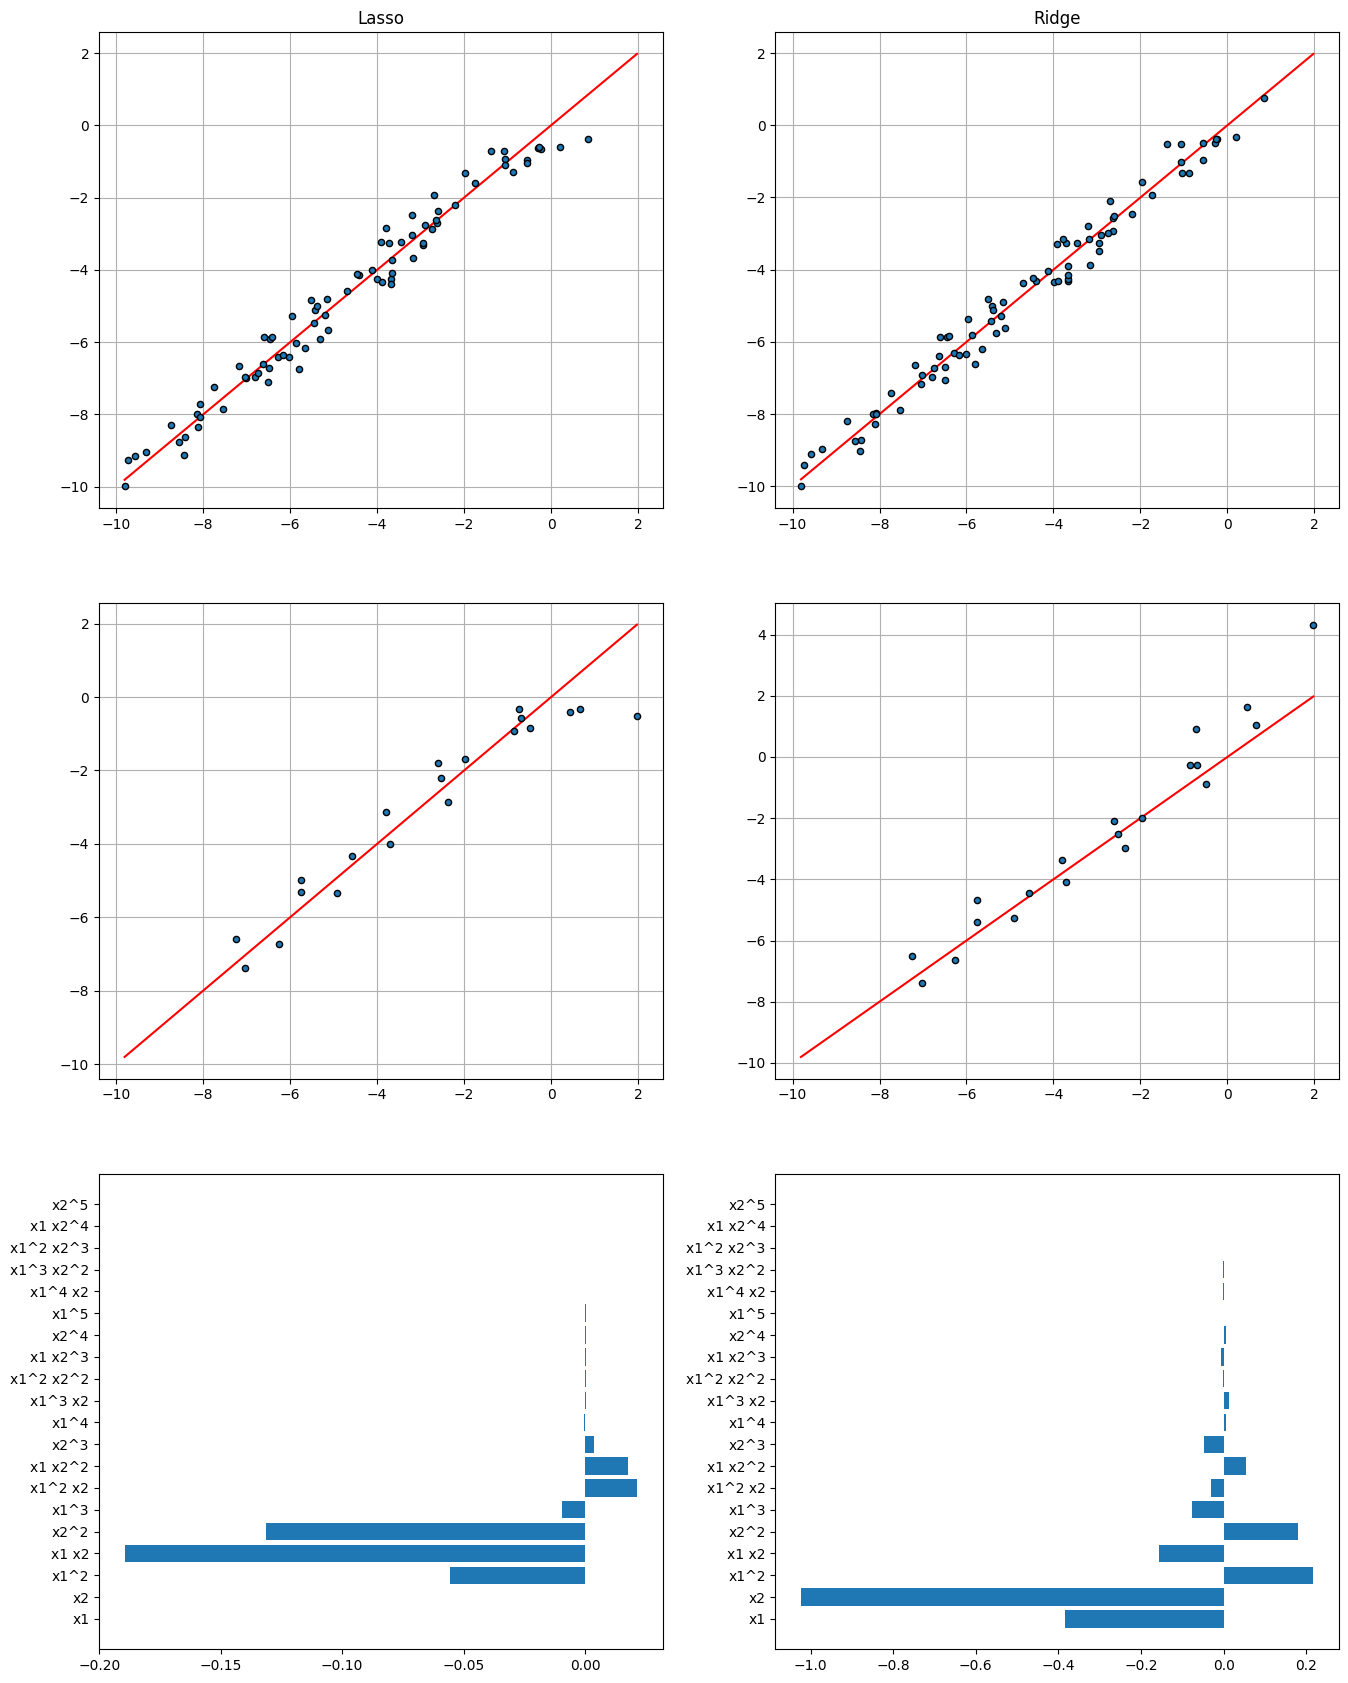

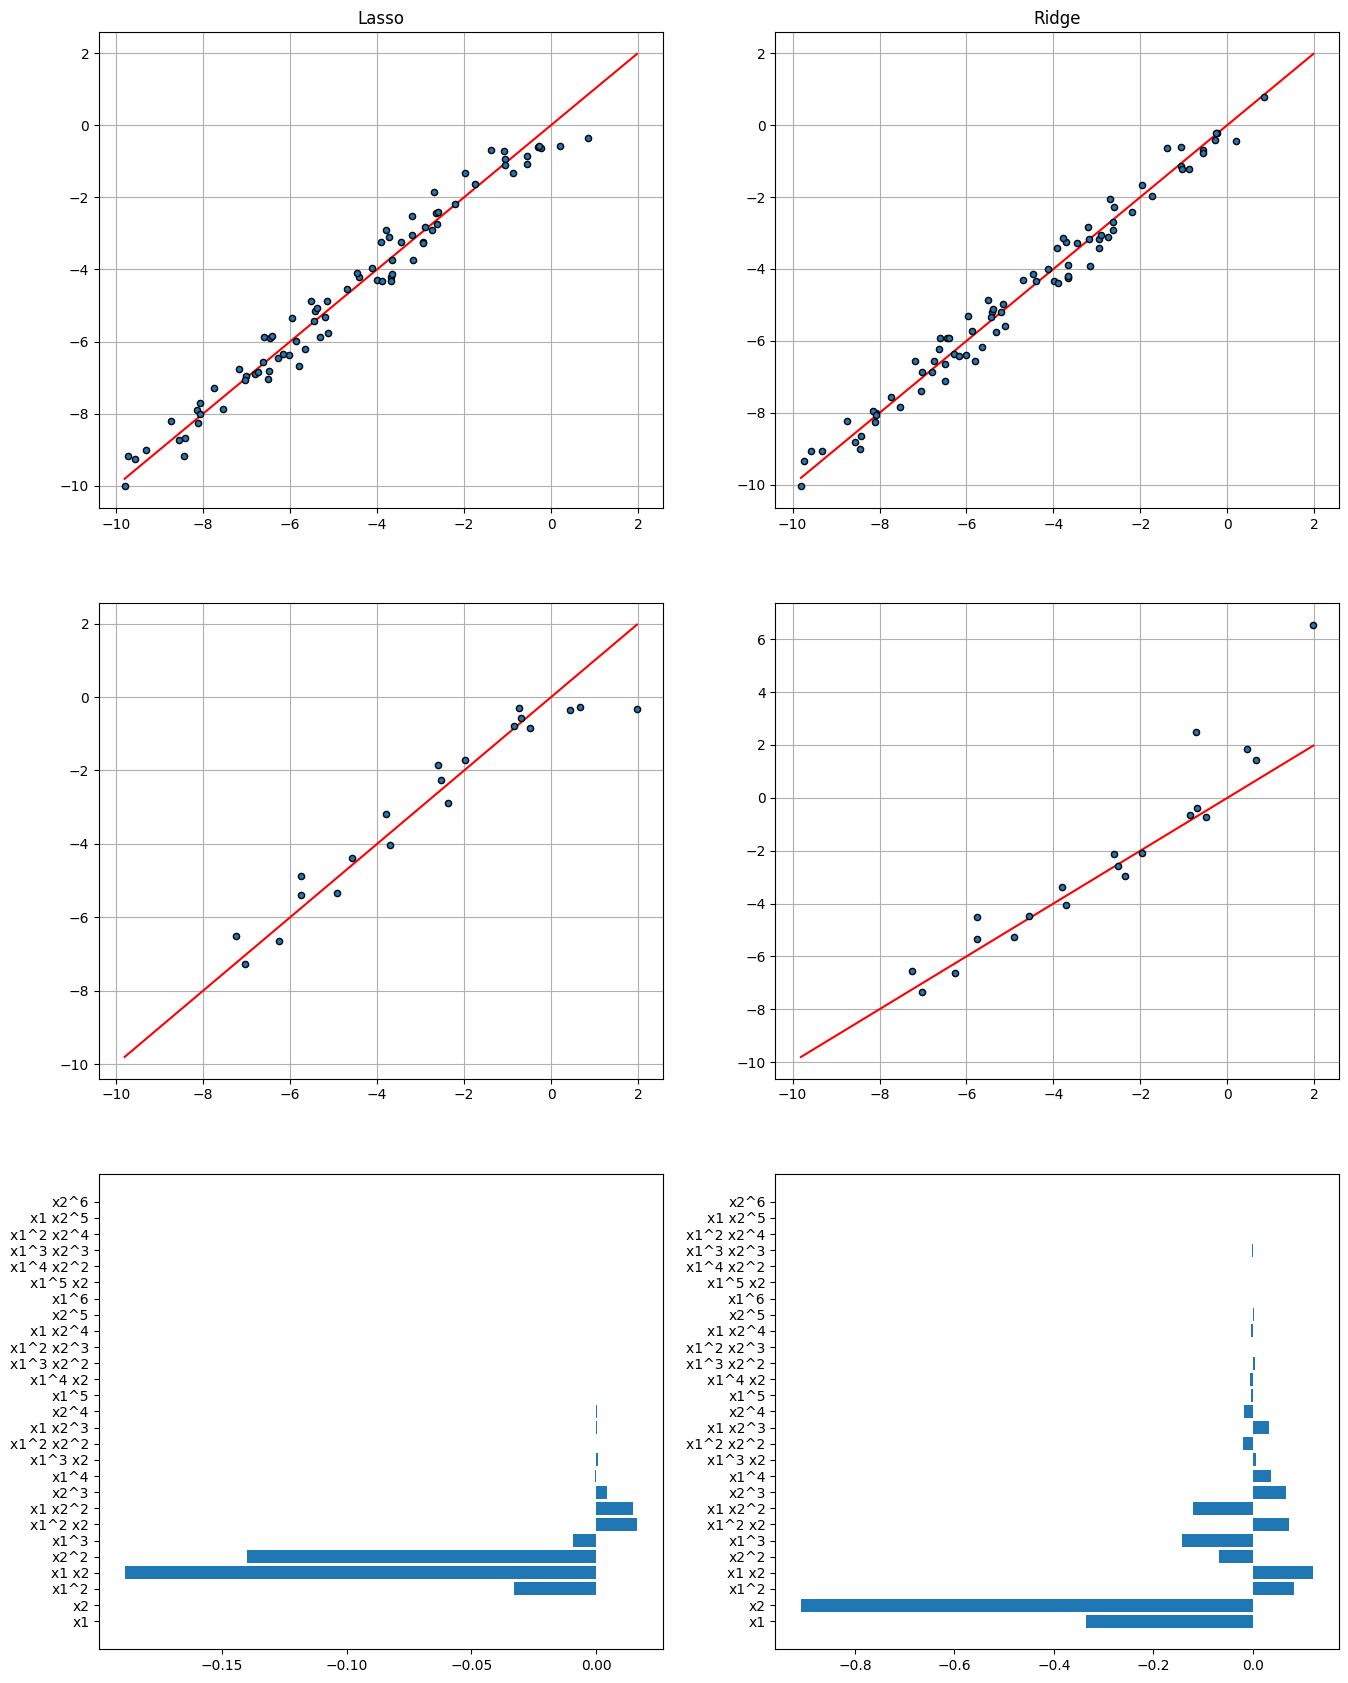

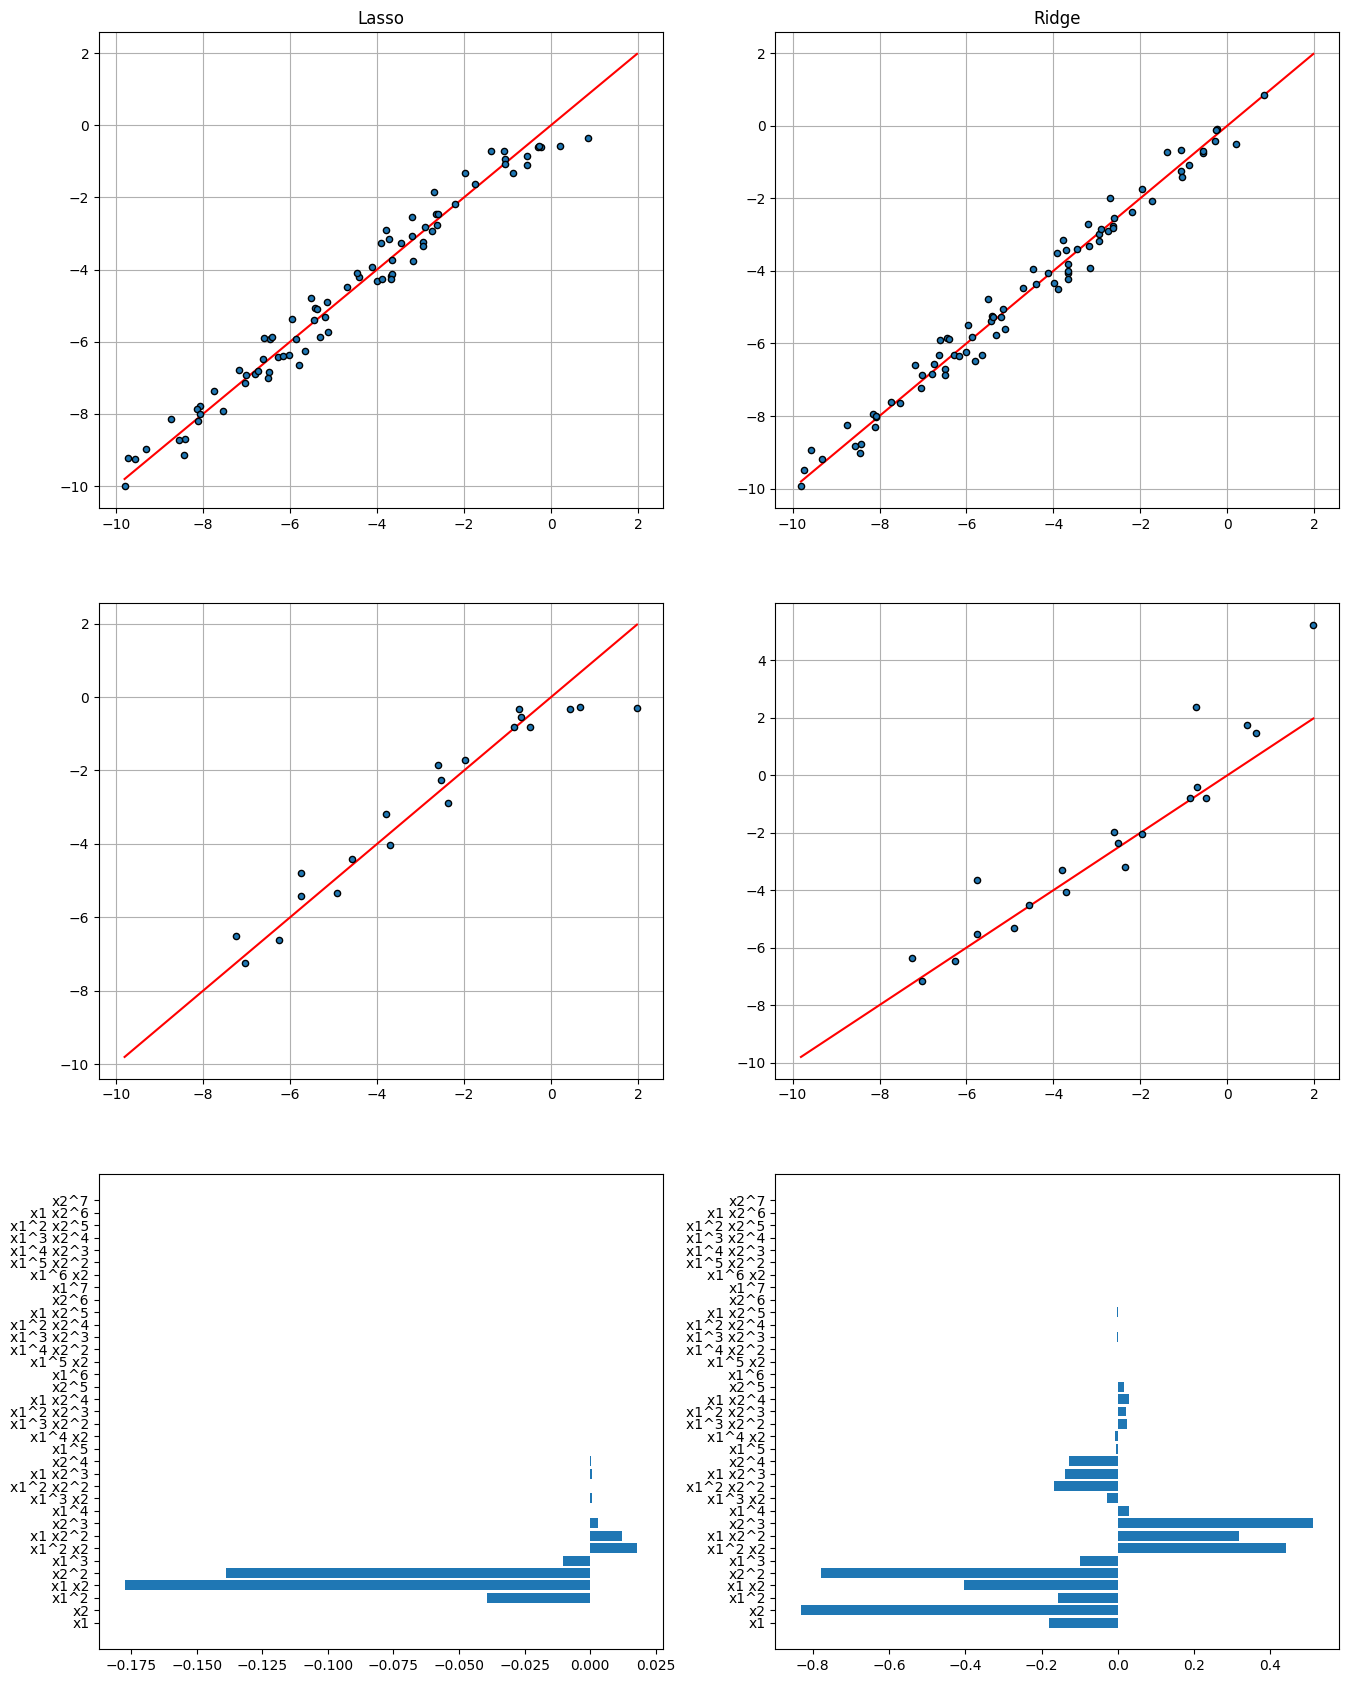

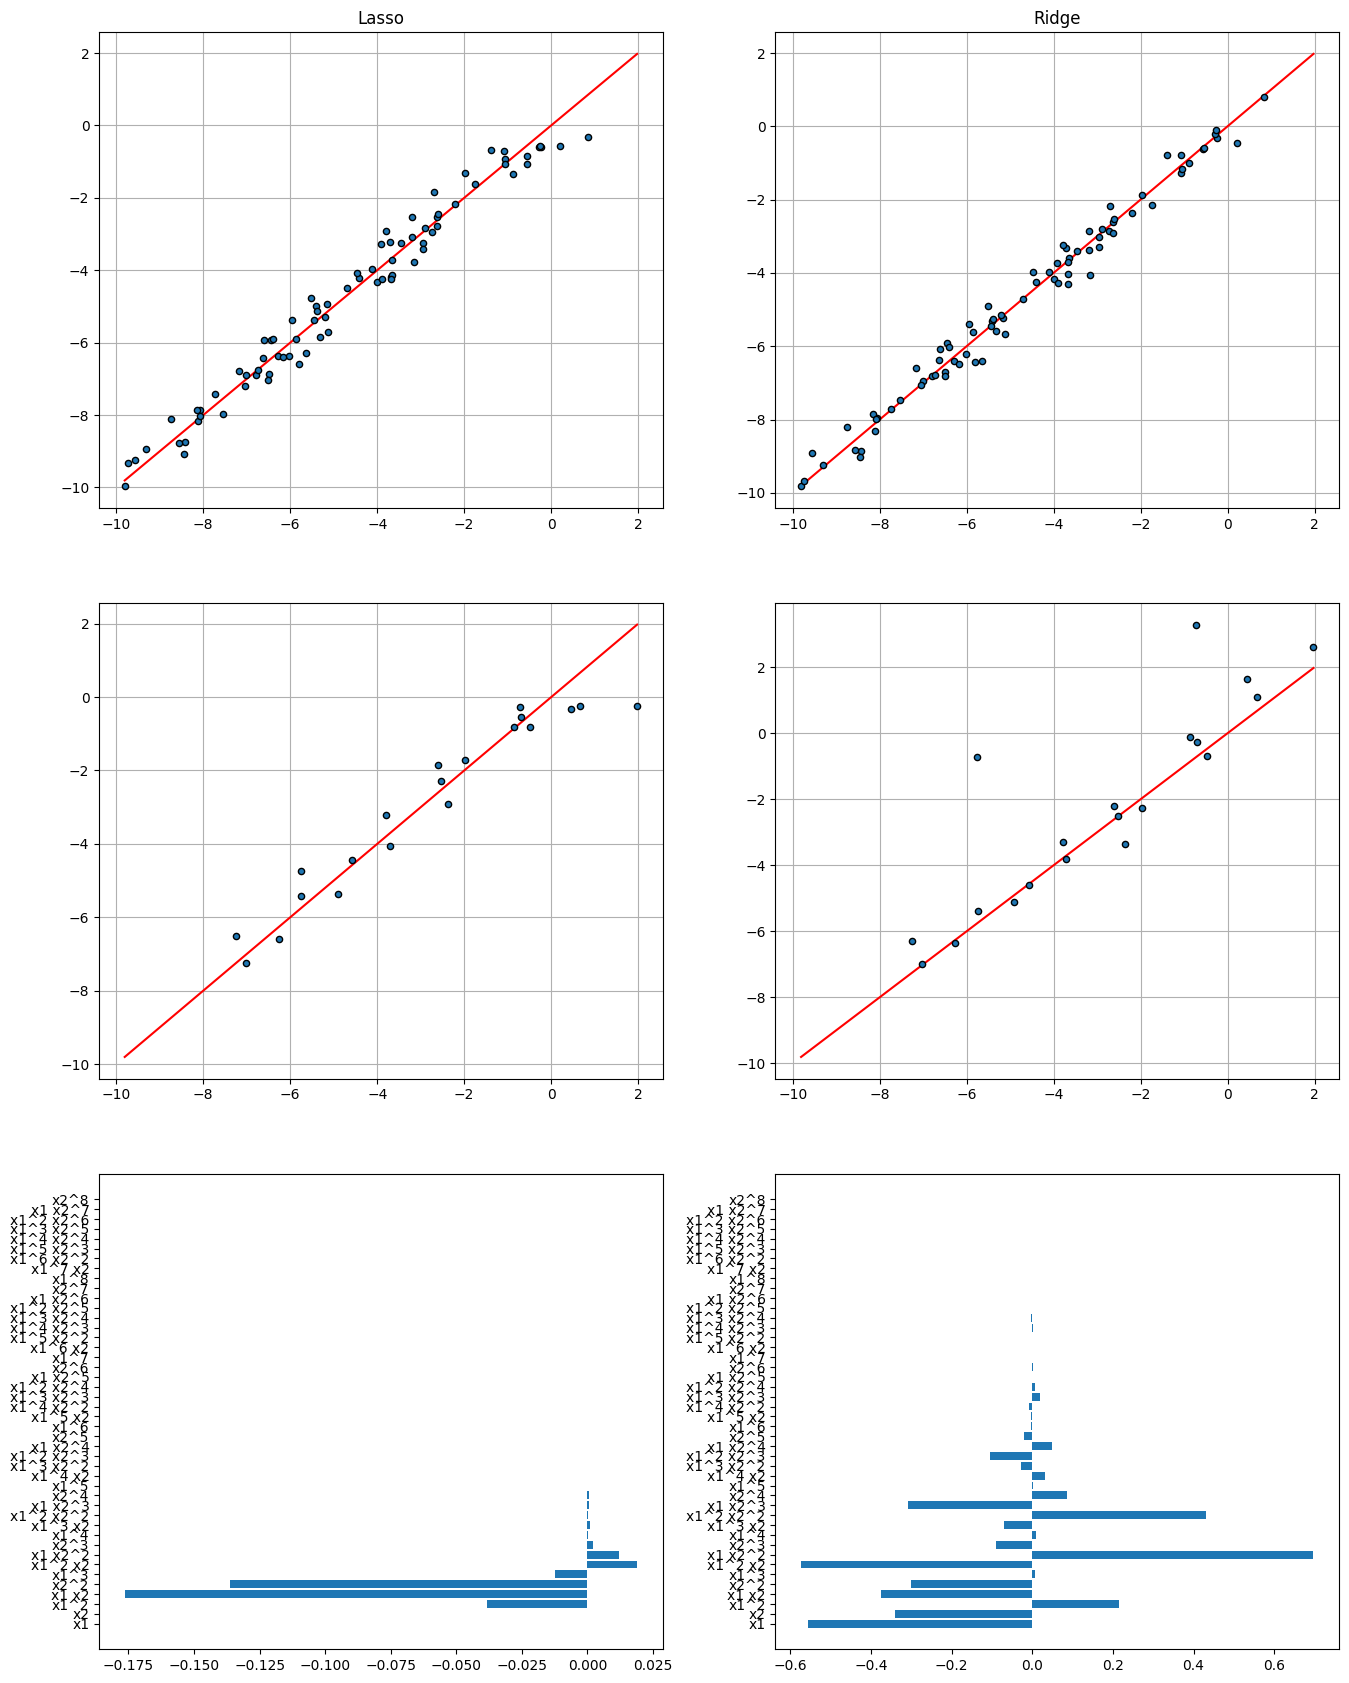

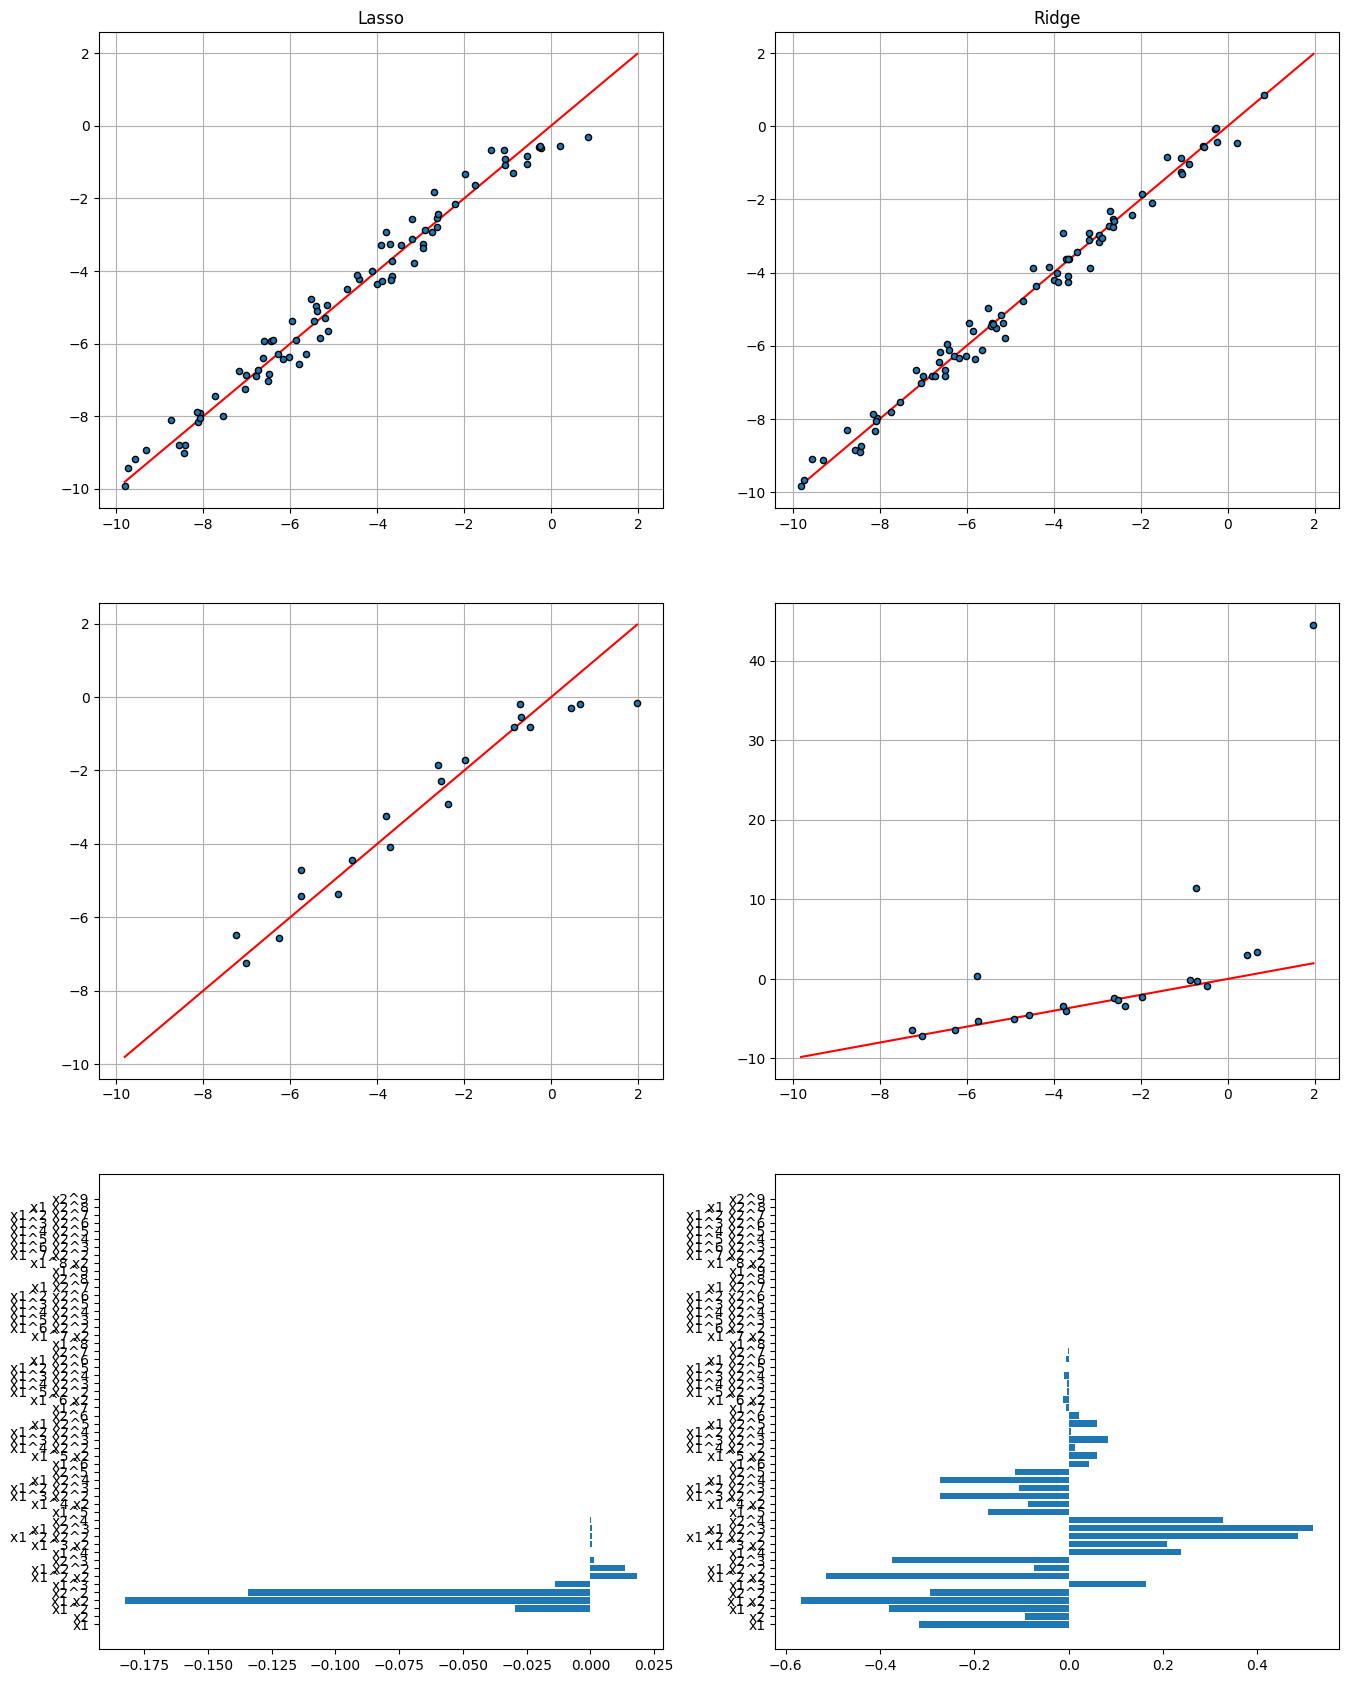

In [17]:
for degree in range(2, 10):
	poly = PolynomialFeatures(degree, include_bias=False)
	
	x_train_poly = poly.fit_transform(x_train)
	x_test_poly = poly.transform(x_test)
	col_degrees = poly.get_feature_names_out(("x1", "x2"))
	
	l1 = Lasso(.1).fit(x_train_poly, y_train)
	l2 = Ridge(.1).fit(x_train_poly, y_train)

	y_pred_l1_train = l1.predict(x_train_poly)
	y_pred_l2_train = l2.predict(x_train_poly)
	y_pred_l1_test = l1.predict(x_test_poly)
	y_pred_l2_test = l2.predict(x_test_poly)

	fig, ax = plt.subplots(3, 2, figsize=(16, 21))

	ax[0, 0].set_title("Lasso")
	ax[0, 1].set_title("Ridge")

	ax[0, 0].scatter(y_train, y_pred_l1_train, s=20, ec="black", zorder=3)
	ax[0, 1].scatter(y_train, y_pred_l2_train, s=20, ec="black", zorder=3)

	ax[1, 0].scatter(y_test, y_pred_l1_test, s=20, ec="black", zorder=3)
	ax[1, 1].scatter(y_test, y_pred_l2_test, s=20, ec="black", zorder=3)

	ax[2, 0].barh(col_degrees, l1.coef_)
	ax[2, 1].barh(col_degrees, l2.coef_)

	for i in range(2):
		for j in range(2):
			ax[i, j].plot((y.min(), y.max()), (y.min(), y.max()), c="r")
			ax[i, j].grid()